<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

<center>모델을 빨리 만드는 것이 목적이 아닙니다. 천천히 생각하고 정리하면서 구문을 정성껏 작성하세요.</center>

# 과제: 이동 통신사 고객 이탈 예측

<img src = "https://github.com/Jangrae/img/blob/master/mobile.png?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 작업에는 주석을 가능한 충분히 답니다.
- 입력을 요구한 **(작성)**, **(의견)** 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 연속형 변수를 구분하고 정규화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.
- 더 나은 성능을 보이도록 특정 모델을 튜닝합니다.

**3) 데이터 정보**

- ID: 고객ID
- COLLEGE: 대학졸업 여부(1,0)
- INCOME: 연 수입액
- OVERAGE: 월 초과사용 시간(분)
- LEFTOVER: 월 사용 잔여시간(분)
- HOUSE: 집 가격
- HANDSET_PRICE: 핸드폰 가격
- OVER_15MINS_CALLS_PER_MONTH: 월 평균 장기통화(15분 이상) 횟수
- AVERAGE_CALL_DURATION: 평균 통화시간(분)
- REPORTED_SATISFACTION: 만족도 설문
- REPORTED_USAGE_LEVEL: 사용 수준 설문
- CONSIDERING_CHANGE_OF_PLAN: 변경 계획 설문
- CHURN: 이탈여부(1 : 이탈, 0 : 잔류)

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [187]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [188]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/mobile.csv'
path = 'https://bit.ly/MobileChurnFile'
data = pd.read_csv(path)

# 2.데이터 탐색

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [189]:
# 상위 데이터 확인
data.head()

,ID,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,544,1,47711,183,17,730589.0,192,19,5,unsat,little,considering,0
1,689,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no,1
2,3134,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering,0
3,12523,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0
4,2374,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no,1


In [190]:
# 하위 데이터 확인
data.tail()

,ID,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
17995,18614,0,31079,200,40,NaN,181,20,11,unsat,little,actively_looking_into_it,0
17996,9704,0,137194,63,0,NaN,787,3,11,very_unsat,little,no,1
17997,13354,0,82931,0,77,NaN,232,0,2,very_unsat,very_little,never_thought,0
17998,2421,0,124391,0,19,NaN,862,0,2,unsat,very_high,no,0
17999,2553,0,104849,223,5,NaN,463,21,5,very_unsat,little,considering,1


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [191]:
# 열 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           18000 non-null  int64  
 1   COLLEGE                      18000 non-null  int64  
 2   INCOME                       18000 non-null  int64  
 3   OVERAGE                      18000 non-null  int64  
 4   LEFTOVER                     18000 non-null  int64  
 5   HOUSE                        17785 non-null  float64
 6   HANDSET_PRICE                18000 non-null  int64  
 7   OVER_15MINS_CALLS_PER_MONTH  18000 non-null  int64  
 8   AVERAGE_CALL_DURATION        18000 non-null  int64  
 9   REPORTED_SATISFACTION        17962 non-null  object 
 10  REPORTED_USAGE_LEVEL         18000 non-null  object 
 11  CONSIDERING_CHANGE_OF_PLAN   18000 non-null  object 
 12  CHURN                        18000 non-null  int64  
dtypes: float64(1), i

**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [192]:
# 기초 통계 정보
data.describe()

,ID,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17785.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,10007.858833,0.502722,80314.400278,86.014833,23.995500,492950.532696,390.096667,8.012778,5.990944,0.492722
std,5767.818549,0.500006,41703.420130,85.963981,26.860363,252175.173507,214.239639,8.932820,4.398894,0.499961
min,2.000000,0.000000,20007.000000,-2.000000,0.000000,150015.000000,130.000000,0.000000,1.000000,0.000000
25%,5010.750000,0.000000,42151.500000,0.000000,0.000000,263876.000000,219.000000,1.000000,2.000000,0.000000
50%,10007.500000,1.000000,75501.500000,59.000000,14.500000,452277.000000,326.000000,4.000000,5.000000,0.000000
75%,14999.250000,1.000000,116082.250000,179.000000,42.000000,701460.000000,536.000000,15.000000,10.000000,1.000000
max,20000.000000,1.000000,159983.000000,335.000000,89.000000,999970.000000,899.000000,29.000000,15.000000,1.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [193]:
# 결측치 확인
data.isna().sum()

ID                               0
COLLEGE                          0
INCOME                           0
OVERAGE                          0
LEFTOVER                         0
HOUSE                          215
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION           38
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
CHURN                            0
dtype: int64

**5) 상관관계 확인**

5-1) 변수들 간의 상관관계를 확인합니다.

In [194]:
# 상관분석
data.corr()

,ID,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN
ID,1.000000,-0.006353,0.002085,-0.005713,0.007089,0.012027,-0.010126,0.000112,-0.007062,0.003499
COLLEGE,-0.006353,1.000000,0.009719,-0.005156,-0.006914,-0.001793,0.009559,-0.010606,-0.000507,0.016748
INCOME,0.002085,0.009719,1.000000,0.001349,0.009729,-0.011239,0.725867,0.003027,-0.009954,0.094168
OVERAGE,-0.005713,-0.005156,0.001349,1.000000,-0.003057,0.002142,-0.001158,0.771545,0.001542,0.237797
LEFTOVER,0.007089,-0.006914,0.009729,-0.003057,1.000000,0.007295,0.006251,-0.009176,-0.659437,0.060022
HOUSE,0.012027,-0.001793,-0.011239,0.002142,0.007295,1.000000,-0.007122,0.006026,-0.007513,-0.211020
HANDSET_PRICE,-0.010126,0.009559,0.725867,-0.001158,0.006251,-0.007122,1.000000,0.002070,-0.003832,0.086517
OVER_15MINS_CALLS_PER_MONTH,0.000112,-0.010606,0.003027,0.771545,-0.009176,0.006026,0.002070,1.000000,0.006812,0.206578
AVERAGE_CALL_DURATION,-0.007062,-0.000507,-0.009954,0.001542,-0.659437,-0.007513,-0.003832,0.006812,1.000000,-0.006333
CHURN,0.003499,0.016748,0.094168,0.237797,0.060022,-0.211020,0.086517,0.206578,-0.006333,1.000000


5-2) 변수들 간의 상관관계를 시각화해 확인합니다. figsize=(10, 8) 정도로 설정합니다.

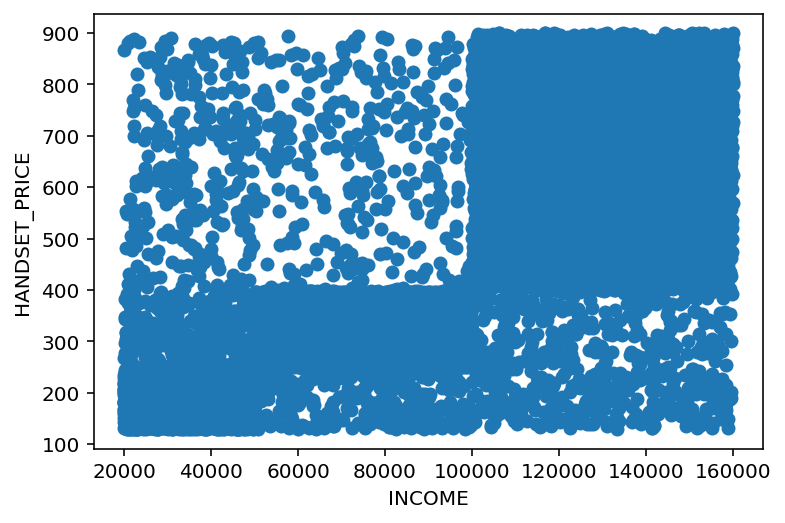

<Figure size 720x576 with 0 Axes>

In [249]:
# 상관관계 시각화
plt.scatter(data['INCOME'], data['HANDSET_PRICE'])
plt.xlabel('INCOME')
plt.ylabel('HANDSET_PRICE')
plt.figure(figsize=(10, 8))
plt.show()


- 연 수입액이 100,000 이상인 고객들의 휴대폰 가격이 높은 범주에 밀집 되어있고 반대로 연 수입액이 100,000 이하인 고객들의 휴대폰 가격이 낮은 범주에 밀집 되어있다.

**6) 범주값 변수 확인**

- 범주형 변수를 식별한 후 그 변수들이 어떤 범주값을 몇 개씩 갖는지 확인합니다.

In [250]:
# 범주값 개수 확인

print(data['COLLEGE'].value_counts())
print('-'*30)
print(data['REPORTED_SATISFACTION'].value_counts())
print('-'*30)
print(data['REPORTED_USAGE_LEVEL'].value_counts())
print('-'*30)
print(data['CONSIDERING_CHANGE_OF_PLAN'].value_counts())
print('-'*30)
print(data['CHURN'].value_counts())
print('-'*30)


1    8925
0    8822
Name: COLLEGE, dtype: int64
------------------------------
very_unsat    6997
very_sat      4508
unsat         3548
avg           1774
sat            920
Name: REPORTED_SATISFACTION, dtype: int64
------------------------------
little         6965
very_high      4583
very_little    3537
high           1793
avg             869
Name: REPORTED_USAGE_LEVEL, dtype: int64
------------------------------
considering                 7028
actively_looking_into_it    4391
no                          3599
never_thought               1783
perhaps                      946
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
------------------------------
0    8996
1    8751
Name: CHURN, dtype: int64
------------------------------


**7) 주요 변수 확인**

7-1) CHURN 변수 값 분포를 막대그래프로 시각화해 확인합니다.

0    8996
1    8751
Name: CHURN, dtype: int64


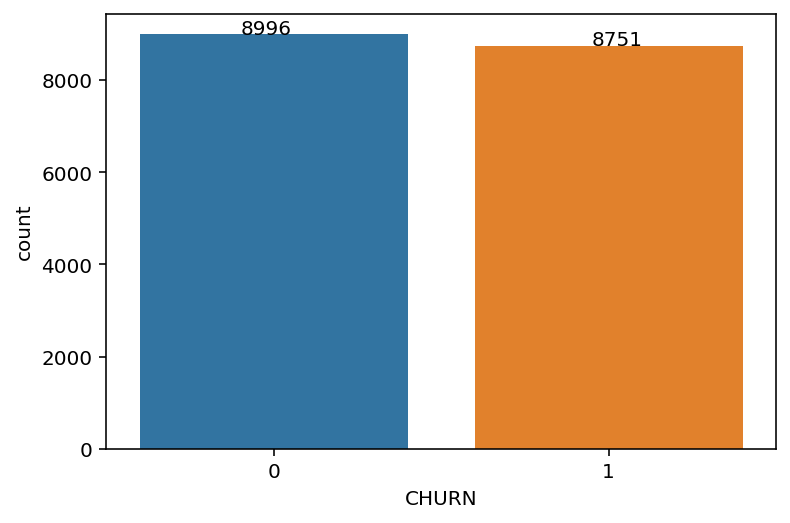

In [251]:
# CHURN 값 분포
cnt = data['CHURN'].value_counts()
data['CHURN'].value_counts()
print(data['CHURN'].value_counts())
sns.countplot(x='CHURN', data=data)
plt.text(-0.1,cnt.values[0]+5,cnt.values[0])
plt.text(0.95,cnt.values[1]+5,cnt.values[1])
plt.show()


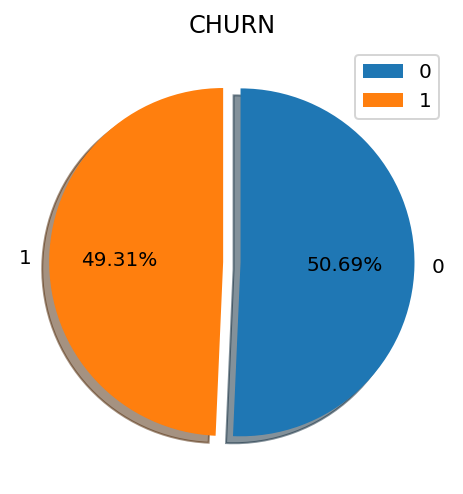

In [333]:
cnt = data['CHURN'].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05], shadow=True)
plt.title('CHURN')
plt.legend()
plt.show()

- 고객 이탈이 절반 가까이 이루어진다는 것은 통신사 입장에서 큰 손해로 발생할 수 있기 때문에 고객 이탈을 줄일 수 있는 방안을 고안해야 한다.
- 이탈하는 고객들의 특징을 데이터를 통해 도출하여 방안을 모색해야 한다.

7-2) CHURN 변수 값으로 구분해 INCOME 변수 값의 분포를 히스토그램으로 확인합니다.

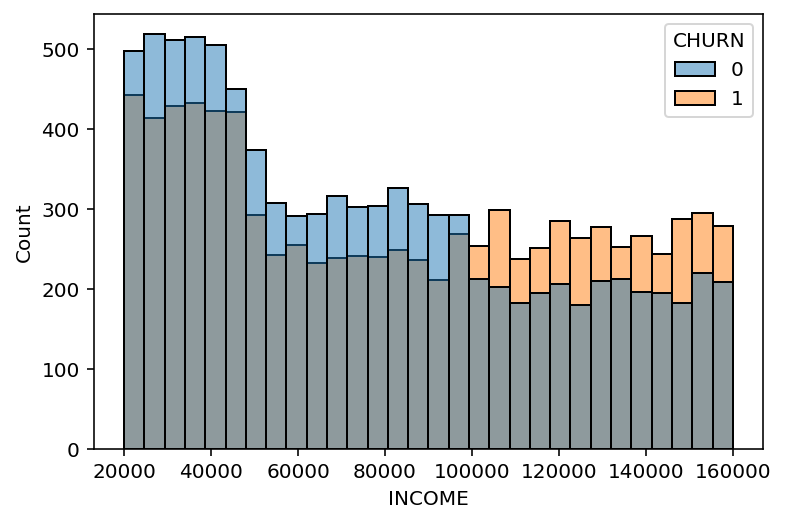

In [253]:
# INCOME --> CHURN 값 분포
sns.histplot(x=data['INCOME'], hue=data['CHURN'], bins=30)
plt.show()

- 연 수입액이 100,000을 넘는 고객들은 이탈하는 고객들의 비율이 더 크다.

7-3) CHURN 변수 값으로 구분해 OVERAGE 변수 값의 분포를 히스토그램으로 확인합니다.

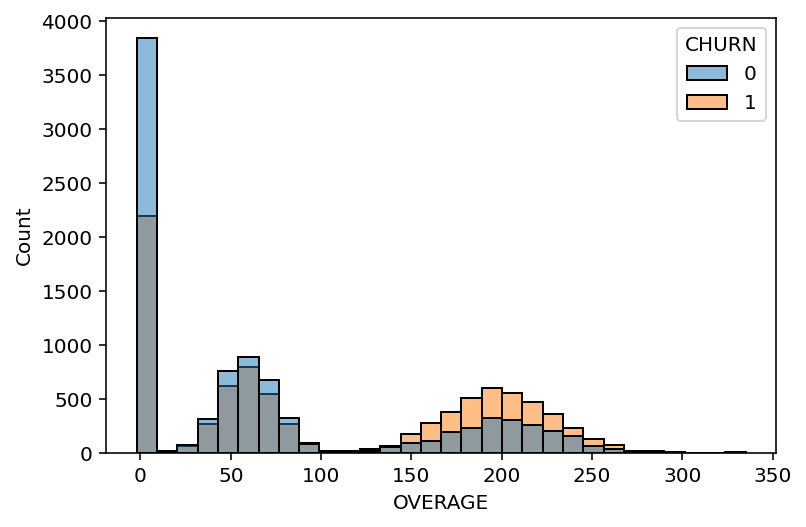

In [254]:
# OVERAGE --> CHURN 값 분포
sns.histplot(x=data['OVERAGE'], hue=data['CHURN'], bins=30)
plt.show()

- 초과 사용량이 150분 이상에서는 이탈하는 고객들의 비율이 더 크게 나온다.
- 초과 사용량이 많은 고객들은 회사에 큰 이익을 줄 수 있는 고객들이기 때문에 이탈하는 것을 방지하는 방안을 모색해야 하며 초과 사용량이 많은 고객들의 이탈 이유를 찾아야 한다.
- 초과 사용량에 대한 과금이 큰 요금 정책이 있어서 이탈률이 높은지에 대해 생각해 볼만 하다.

7-4) CHURN 변수 값으로 구분해 HOUSE 변수 값의 분포를 히스토그램으로 확인합니다.

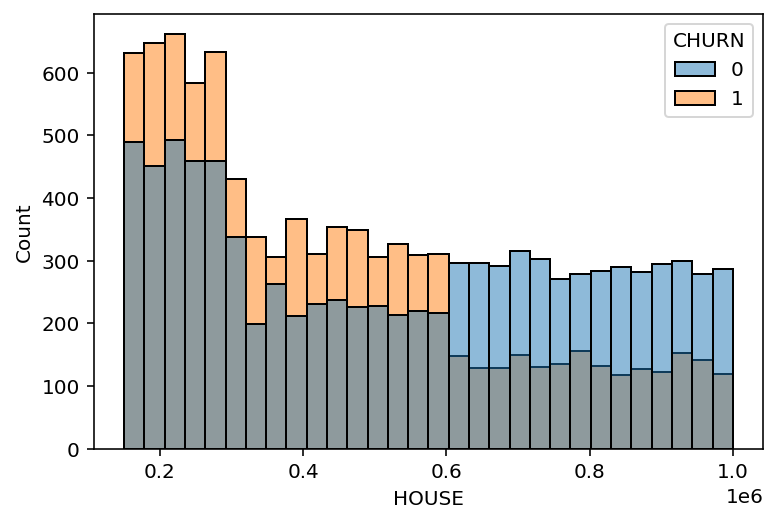

In [255]:
# HOUSE --> CHURN 값 분포
sns.histplot(x=data['HOUSE'], hue=data['CHURN'], bins=30)
plt.show()

- 집 가격이 0.6*e6 이하인 고객들의 이탈이 더 많이 일어난다.
- 집 가격이 적은 고객들의 가계 상황이 곤란하여 통신사를 옮기며 신규가입 혜택을 받기 때문에 이탈하는 것이라면 고객들의 연 수입액(INCOME)과 비교하여 확인해 볼 필요가 있다.

7-5) CHURN 변수 값으로 구분해 HANDSET_PRICE 변수 값의 분포를 히스토그램으로 확인합니다.

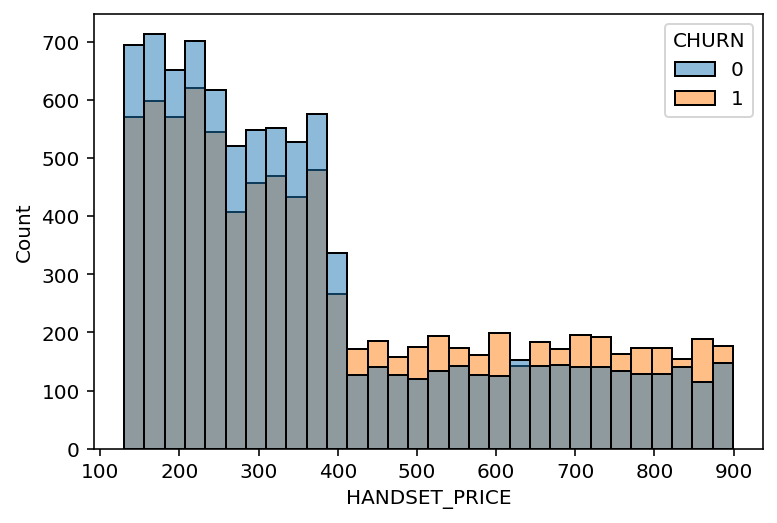

In [256]:
# HANDSET_PRICE --> CHURN 값 분포
sns.histplot(x=data['HANDSET_PRICE'], hue=data['CHURN'], bins=30)
plt.show()

- 핸드폰 가격이 400 이상인 고객들에서는 이탈 비율이 더 크게 나타난다.
- 하지만 핸드폰 가격이 400이하인 고객들에서의 이탈하는 고객의 수는 더 많은 것으로 보인다.

# 3.데이터 준비


- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 불필요한 열 제거**

- 불필요한 ID 열을 제거합니다.

In [257]:
# 열 제거
data.drop('ID', axis=1, inplace=True)

# 확인
data.head()

KeyError: "['ID'] not found in axis"

**2) 결측치 제거**

- 결측치자 있는 행은 얼마 안되니 모두 제거합니다.

In [258]:
# 결측치 제거
data.dropna(axis=0, inplace=True)

# 확인
data.isna().sum()

COLLEGE                        0
INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
CHURN                          0
dtype: int64

**3) x, y 분리**

- CHURN 변수가 Target입니다.
- x, y가 분리된 이후부터 y는 절대로 건드지지 않아야 합니다.

In [259]:
# target 확인
target = 'CHURN'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**4) 가변수화**

- 왜 x의 다음 변수들이 가변수화 대상이 되는지 파악한 후 가변수화를 진행합니다.
    - REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN 

In [260]:
# 가변수화
cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns=cols, drop_first=True)

# 확인
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,19,5,unsat,little,considering,0
1,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no,1
2,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering,0
3,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0
4,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no,1


**5) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [261]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 각각의 성능을 확인합니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.
- 각 알고리즘별로 요구되는 내용을 숙지하면서 모델링을 진행합니다.

## 4.1.Decision Tree

### 4.1.1.모델링

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.
- max_depth 값을 설정하시 마세요.(이후에 설정함)

In [314]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [315]:
# 2단계: 선언하기
model = DecisionTreeClassifier(random_state=2022)

In [316]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [317]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [318]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1656 1001]
 [1073 1595]]
              precision    recall  f1-score   support

           0       0.61      0.62      0.61      2657
           1       0.61      0.60      0.61      2668

    accuracy                           0.61      5325
   macro avg       0.61      0.61      0.61      5325
weighted avg       0.61      0.61      0.61      5325



### 4.1.2.트리 시각화 #1

1) max_depth를 설정하지 않는 상태의 accuracy score는 얼마인가요? 0.61

2) max_depth를 설정하지 않는 모델에서 plot_tree를 사용해 시각화해 확인합니다.(많은 시간 소요됨, 인내가 필요)

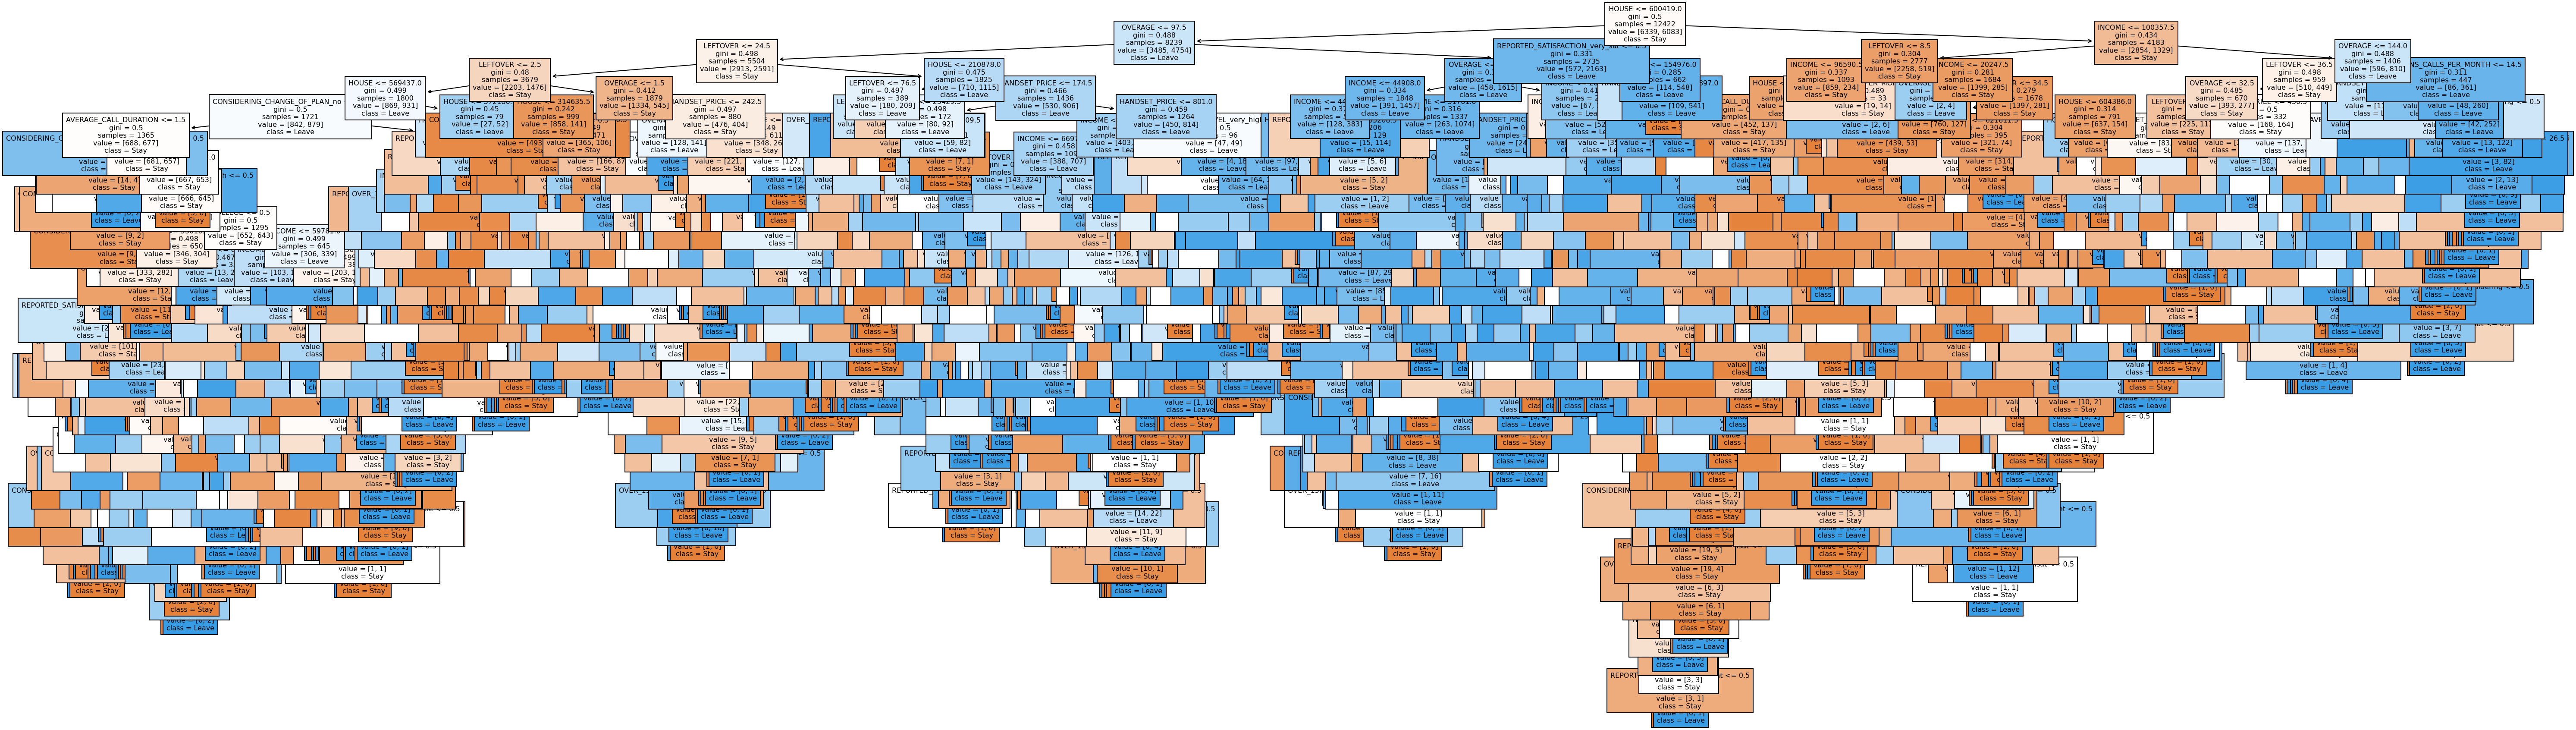

In [319]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 15))
plot_tree(model, filled=True, class_names=['Stay', 'Leave'], feature_names=list(x), fontsize=8)
plt.show()

- 처음에는 중요도가 가장 높은 HOUSE(집 가격) 600419.0을 기준으로 나뉜다.
- 두번째 분기에서 왼쪽은 OVERAGE(월 초과사용 시간(분)) 97.5를 기준으로 나뉘고 오른쪽은 INCOME(연 수입액) 100357.5를 기준으로 나뉜다.

### 4.1.3.변수 중요도 확인 #1

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [268]:
# 중요도 확인
print(model.feature_importances_)

[0.01776111 0.18935937 0.16154656 0.08943165 0.20510723 0.11668086
 0.05480339 0.05048389 0.00390964 0.01132138 0.01040716 0.01370948
 0.00723129 0.01407693 0.01139179 0.01115107 0.01012771 0.00637647
 0.00926775 0.00585526]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

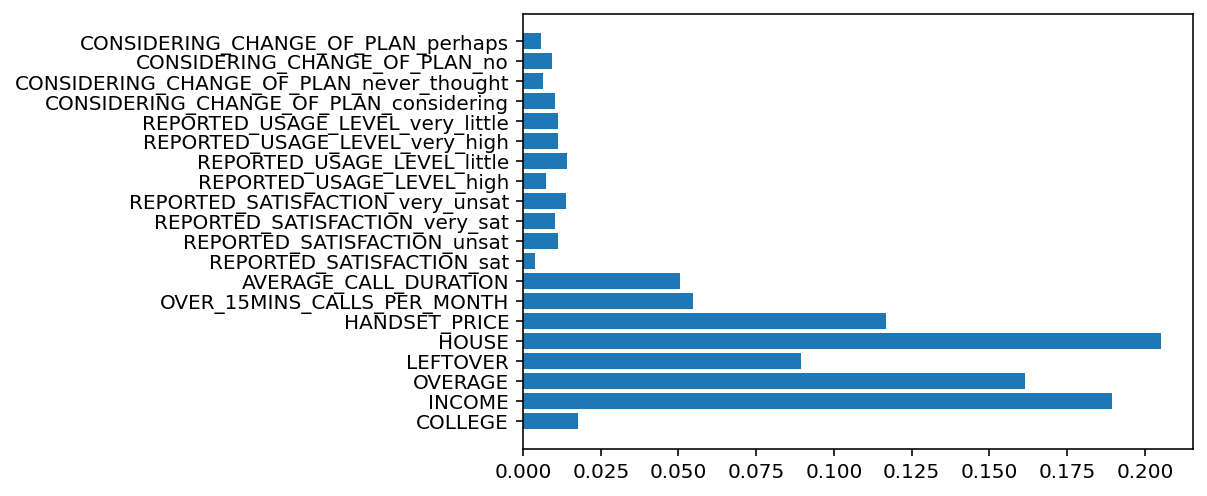

In [269]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- HOUSE - INCOME - OVERAGE - HANDSET PRICE 순으로 중요도가 높다.
- (의견)

### 4.1.4.트리 시각화 #2

1) max_depth=5로 설정해 모델링 2단계~5단계를 수행합니다. accuracy score는 얼마인가요? 0.70

2) max_depth=5로 설정한 모델의 트리를 다시 시각화해 확인합니다.(이미지 바탕화면으로 꺼내 자세히 확인)

In [285]:
# 2단계: 선언하기
model = DecisionTreeClassifier(max_depth=5, random_state=2022)

In [286]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2022)

In [287]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [288]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1726  931]
 [ 644 2024]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      2657
           1       0.68      0.76      0.72      2668

    accuracy                           0.70      5325
   macro avg       0.71      0.70      0.70      5325
weighted avg       0.71      0.70      0.70      5325



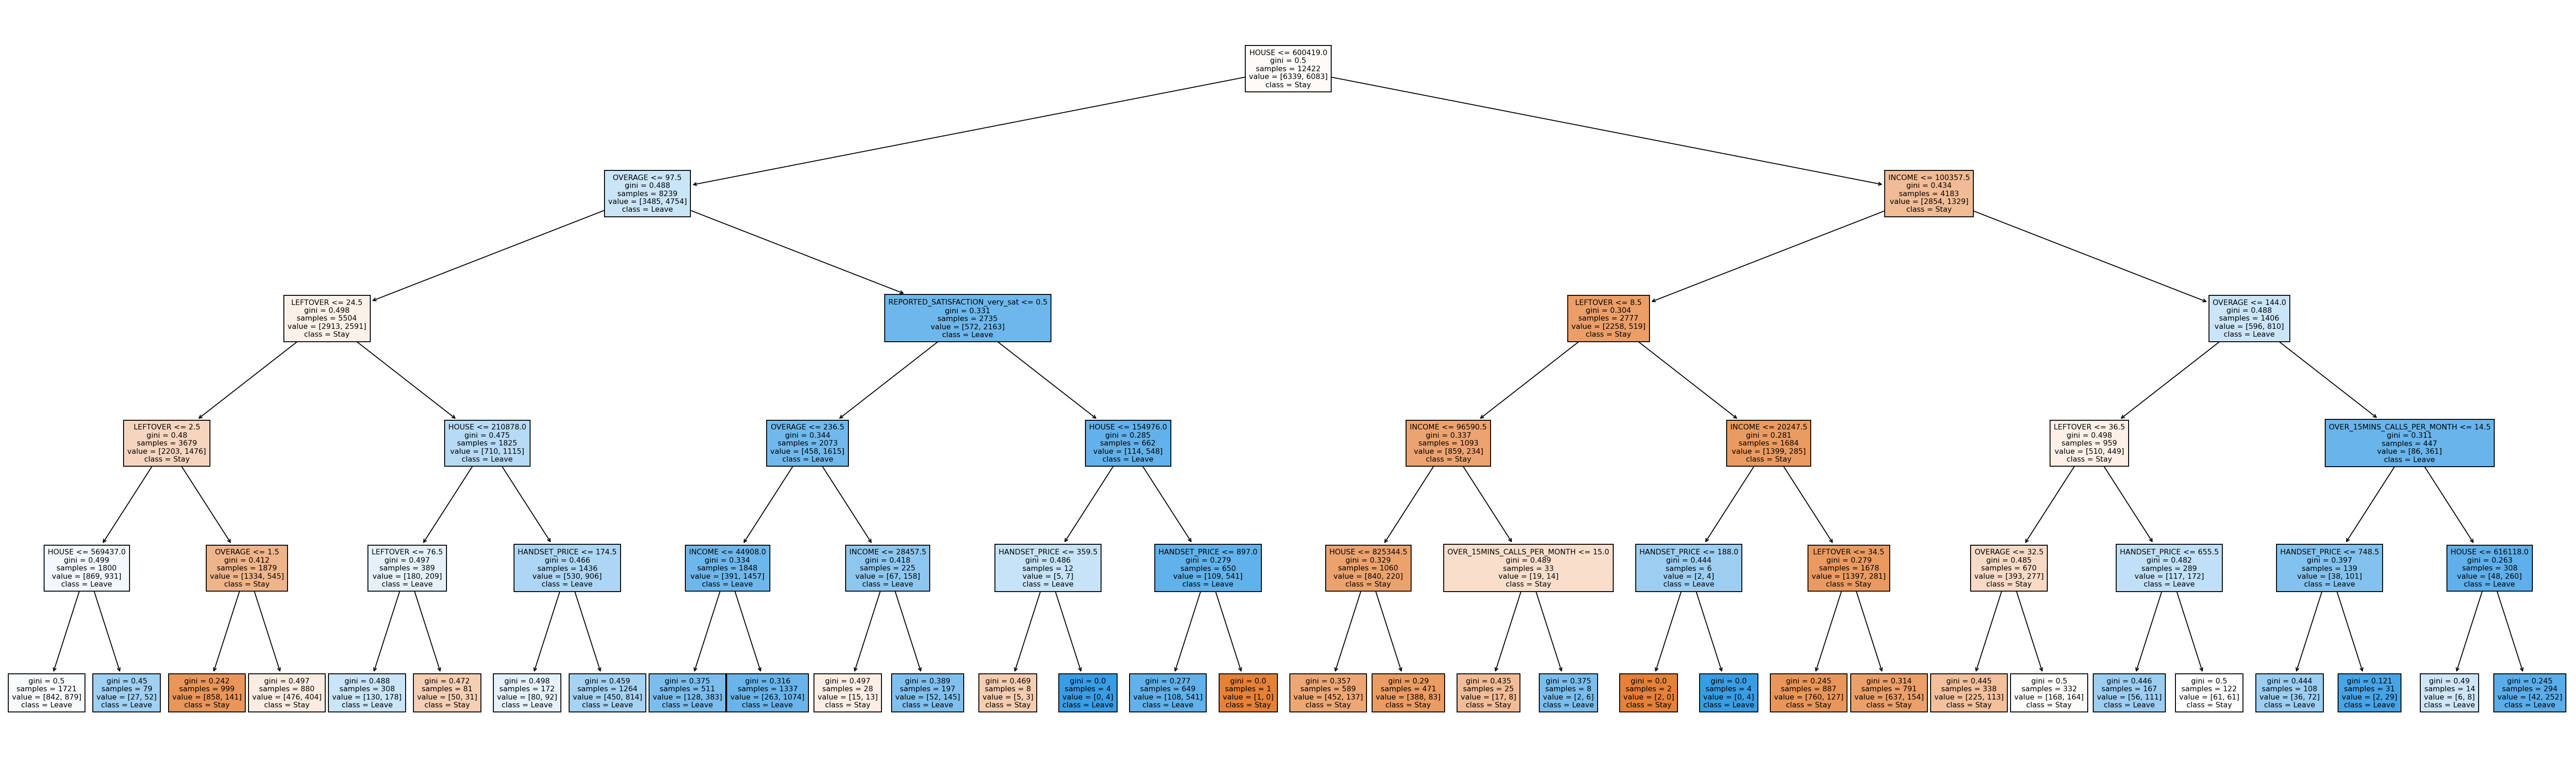

In [289]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 15))
plot_tree(model, filled=True, class_names=['Stay', 'Leave'], feature_names=list(x), fontsize=8)
plt.show()

- max_depth를 설정하면 설정하지 않은 것에 비해 속도도 빠르고 가독성도 좋다.
- 중요도가 높은 것으로만 분기되는것으로 보이지만 REPORTED_SATISFACTION_vert_sat를 기준으로도 분기되는 것으로 보아 REPORTED_SATISFACTION 변수에 대해 분석해 볼 필요가 있다.

### 4.1.5.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [275]:
# 중요도 확인
print(model.feature_importances_)

[0.         0.19873837 0.37165334 0.15205158 0.26114906 0.01150191
 0.00329781 0.         0.         0.         0.00160793 0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

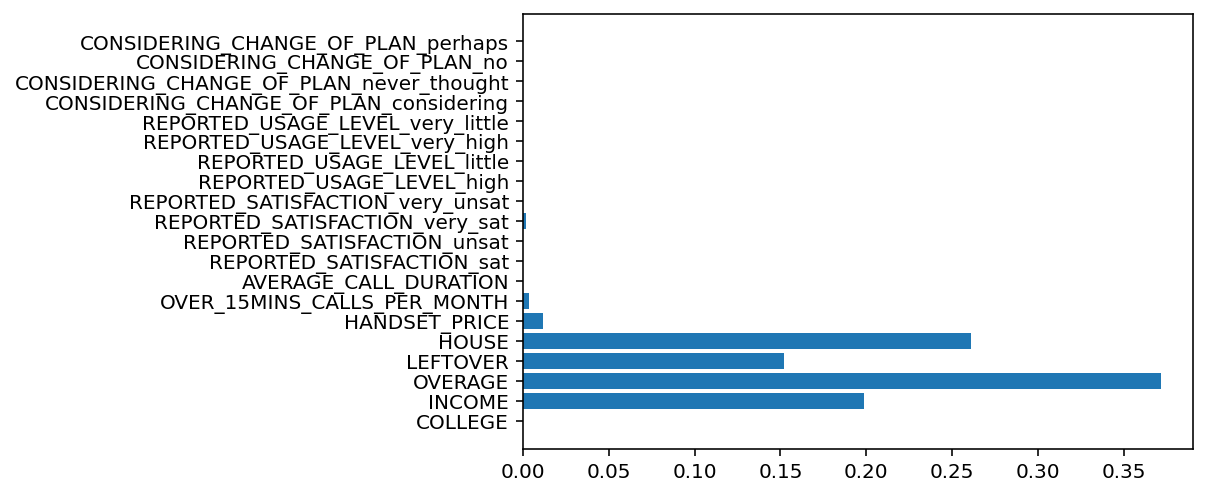

In [276]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- max_depth를 설정한 후 분기된 변수를 제외한 나머지 변수들의 중요도가 0이 되었고 분기된 변수들의 중요도 비율도 그에 따라 증가하였다.

## 4.2.Random Forest

### 4.2.1.모델링

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [277]:
# 불러오기
from sklearn.ensemble import RandomForestClassifier

In [278]:
# 선언하기
model = RandomForestClassifier(random_state=2022)

In [279]:
# 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [280]:
# 예측하기
y_pred = model.predict(x_test)

In [281]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1847  810]
 [ 816 1852]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      2657
           1       0.70      0.69      0.69      2668

    accuracy                           0.69      5325
   macro avg       0.69      0.69      0.69      5325
weighted avg       0.69      0.69      0.69      5325



### 4.2.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [282]:
# 중요도 확인
print(model.feature_importances_)

[0.0181983  0.14332592 0.12704578 0.09144028 0.19745566 0.12872412
 0.08101778 0.06681335 0.00648981 0.01263543 0.01403857 0.01558861
 0.009228   0.01511816 0.01334498 0.01280605 0.01687989 0.0100806
 0.01298384 0.00678488]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

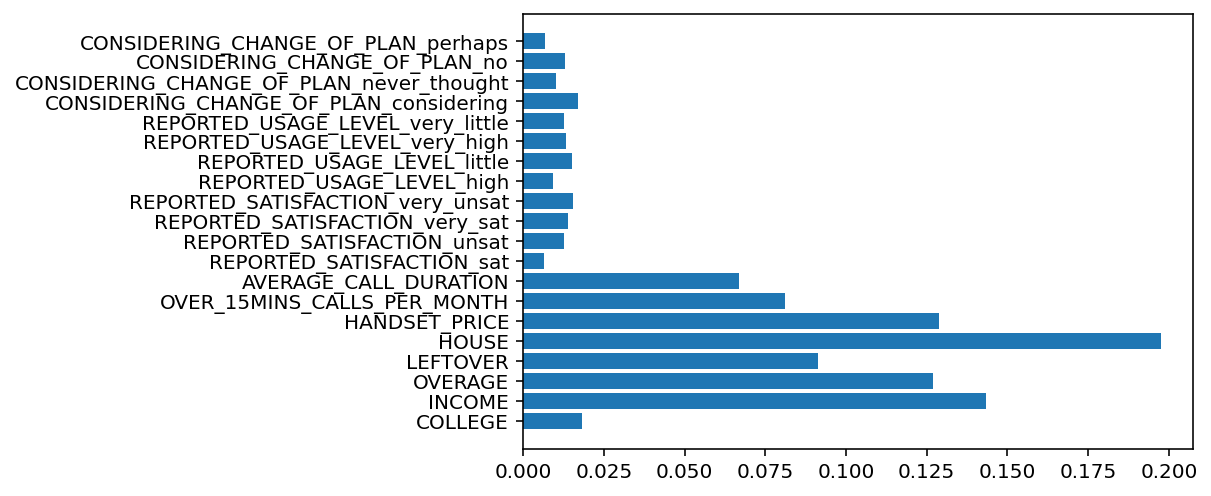

In [283]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- 변수들의 중요도 순서는 변화는 없는 것으로 보인다.

## 4.3.XGBoost

### 4.3.1. 모델링

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [230]:
# !pip install xgboost

In [291]:
# 불러오기
from xgboost import XGBClassifier

In [292]:
# 선언하기
model = XGBClassifier(max_depth=10, random_state=2022, n_estimators=20)

In [293]:
# 학습하기
model.fit(x_train, y_train)

[14:38:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [294]:
# 예측하기
y_pred = model.predict(x_test)

In [295]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1807  850]
 [ 797 1871]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      2657
           1       0.69      0.70      0.69      2668

    accuracy                           0.69      5325
   macro avg       0.69      0.69      0.69      5325
weighted avg       0.69      0.69      0.69      5325



### 4.3.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [296]:
# 중요도 확인
print(model.feature_importances_)

[0.04900062 0.07394191 0.13317063 0.08271761 0.07709876 0.0412856
 0.03762465 0.03607855 0.03880179 0.04338995 0.03575764 0.037057
 0.03552473 0.03737668 0.04461681 0.04138255 0.03680361 0.04254608
 0.03624387 0.03958093]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

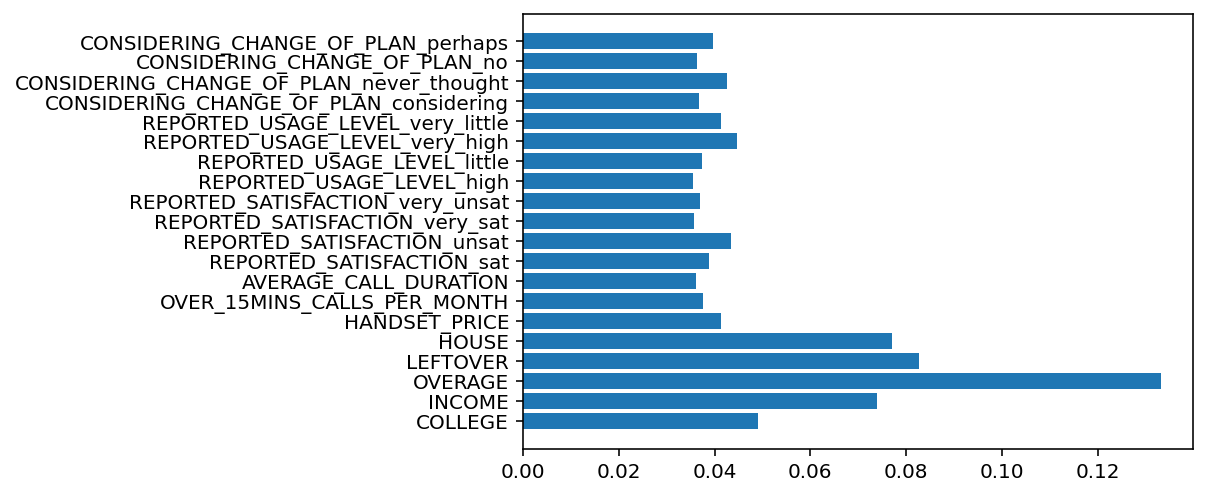

In [297]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- 다른 알고리즘 모델에서 중요도가 낮았던 변수들의 중요도 상승하였다.
- 다른 알고리즘 모델에서 가장 중요도가 높았던 HOUSE의 중요도가 하락하여 3번째에 위치하였고 OVERAGE의 중요도가 가장 높게 나왔다.

# 5.정리

- 알고리즘마다 중요 변수를 찾는 과정이 다르므로 동일한 변수가 여러 알고리즘에서 가장 중요도가 높은 변수라고 할 수는 없다.
- Decision Tree와 Random Forest 알고리즘 모델에서는 HOUSE가 가장 중요한 변수로 작용하였고 XGBoost 알고리즘 모델에서는 OVERAGE 변수가 가장 중요한 변수로 작용하였다

# 6.성능 튜닝

- 위 모델 중 하나를 선택해 Grid Search 또는 Random Search를 사용해 성능을 높여봅니다.

In [330]:
# RandomForest 모델 Grid Search 튜닝
# 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 파라미터 선언
rand_param = {'max_depth' : range(1, 51)}

# 선언하기
model_dst = RandomForestClassifier(random_state=2022)

model = GridSearchCV(model_dst,   # 기본 모델
                          rand_param,   # 파라미터 변수
                          cv=10,        # cv 값(K-Fold Cross Validation의 분할 수)
                          n_jobs=-1) # 성능 기준
# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[1880  777]
 [ 809 1859]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      2657
           1       0.71      0.70      0.70      2668

    accuracy                           0.70      5325
   macro avg       0.70      0.70      0.70      5325
weighted avg       0.70      0.70      0.70      5325



{'max_depth': 12} 0.6992414202302621


<BarContainer object of 20 artists>

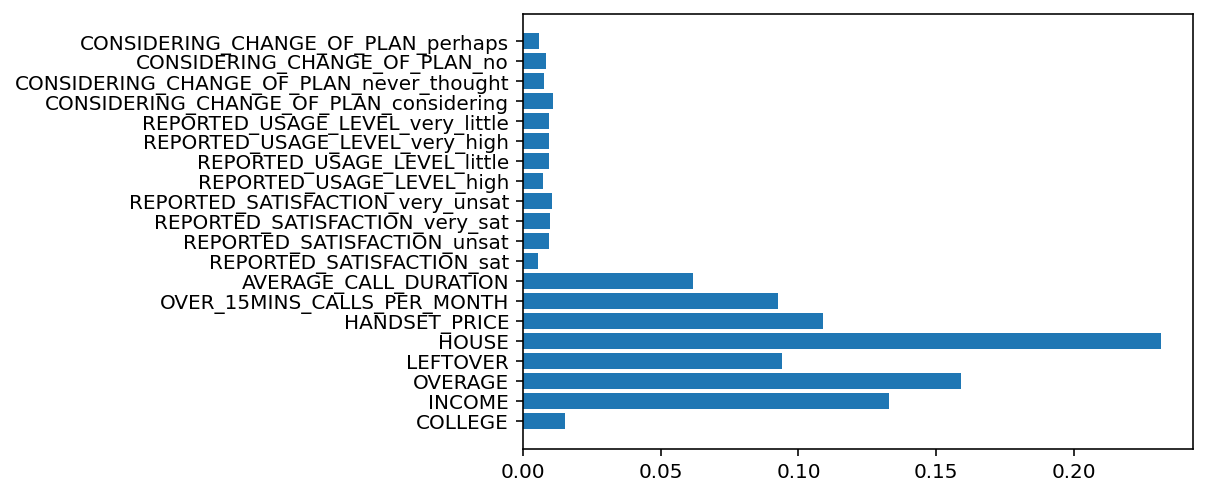

In [307]:
print(model.best_params_, model.best_score_)
plt.barh(list(x), model.best_estimator_.feature_importances_)

In [326]:
# RandomForest 모델 Grid Search 튜닝
# 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# 파라미터 선언
rand_param = {'max_depth' : range(1, 51)}

# 선언하기
model_dst = RandomForestClassifier(random_state=2022)

model = RandomizedSearchCV(model_dst,   # 기본 모델
                          rand_param,   # 파라미터 변수
                          cv=10,        # cv 값(K-Fold Cross Validation의 분할 수)
                          n_jobs=-1) # 성능 기준

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2012  645]
 [ 939 1729]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      2657
           1       0.73      0.65      0.69      2668

    accuracy                           0.70      5325
   macro avg       0.71      0.70      0.70      5325
weighted avg       0.71      0.70      0.70      5325



{'max_depth': 7} 0.695780493144864


<BarContainer object of 20 artists>

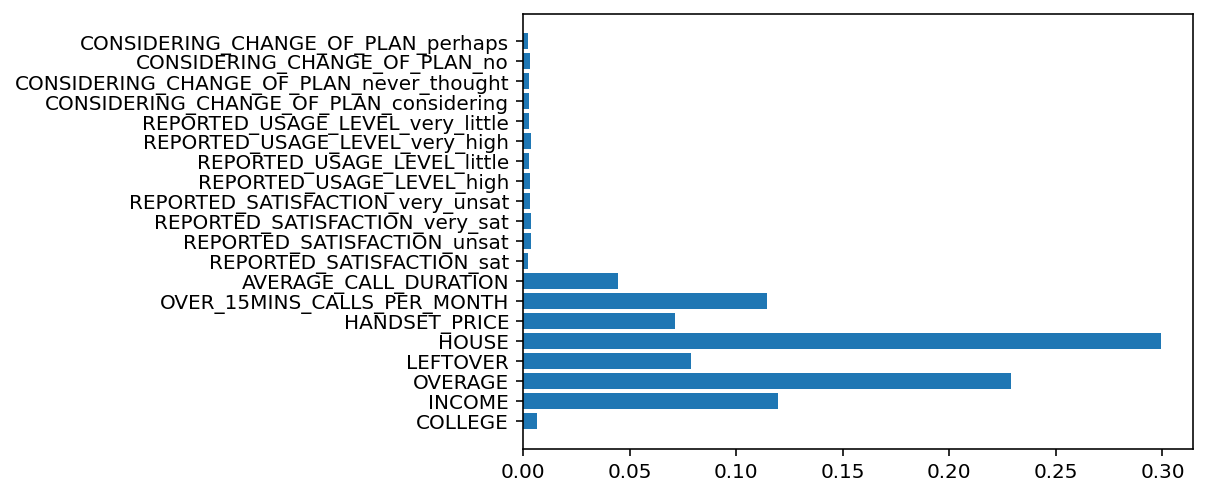

In [329]:
print(model.best_params_, model.best_score_)
plt.barh(list(x), model.best_estimator_.feature_importances_)